<a href="https://colab.research.google.com/github/Imran0897/Placement-Assignment_Md_Imran/blob/main/ML_02_Placement_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Placement_Task/ML_02/ObesityDataSet_raw_and_data_sinthetic.csv")

In [36]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [38]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [39]:
columns_cat_num = [i for i in df.columns if df[i].dtype == 'object' and i != 'NObeyesdad']

In [40]:
columns_cat_num

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [41]:
df.shape

(2111, 17)

In [42]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [43]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [44]:
ordinal_encoder = OrdinalEncoder()
df[columns_cat_num] = ordinal_encoder.fit_transform(df[columns_cat_num])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   float64
 5   FAVC                            2111 non-null   float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   float64
 9   SMOKE                           2111 non-null   float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   float64
 12  FAF                             21

In [46]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [47]:
dic_to_replace = {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6
                         }

In [48]:
df['NObeyesdad']=df['NObeyesdad'].map(dic_to_replace)

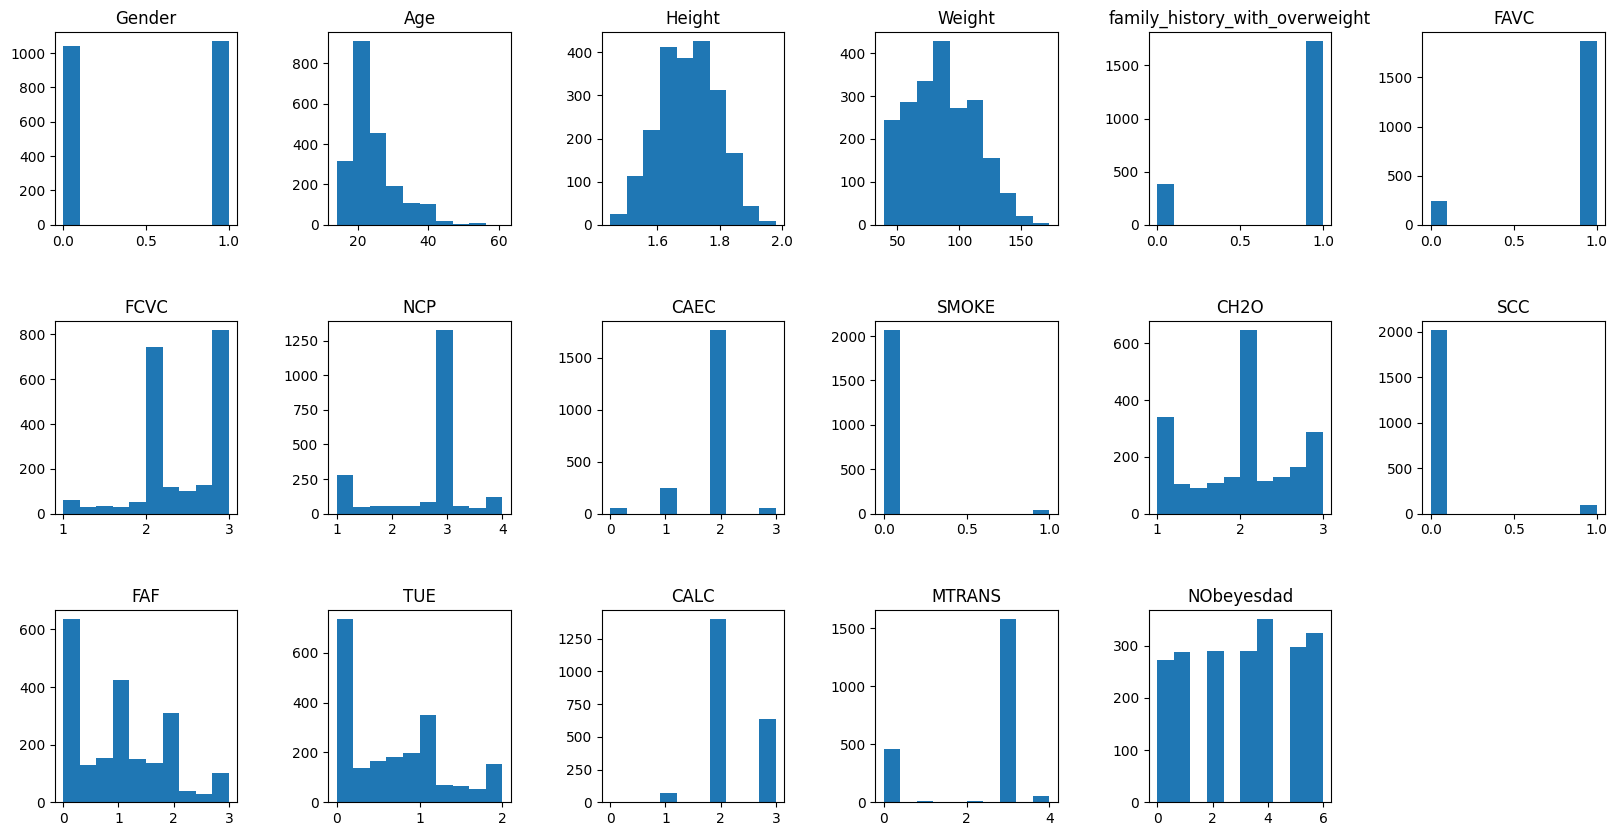

In [51]:
import math
# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(df.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(df.iloc[:, i], bins=10)
        ax.set_title(df.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

<Axes: xlabel='FAVC', ylabel='count'>

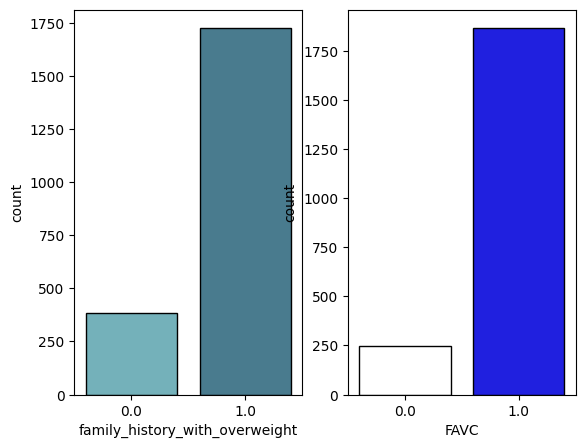

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = df, palette="flag",edgecolor="black")

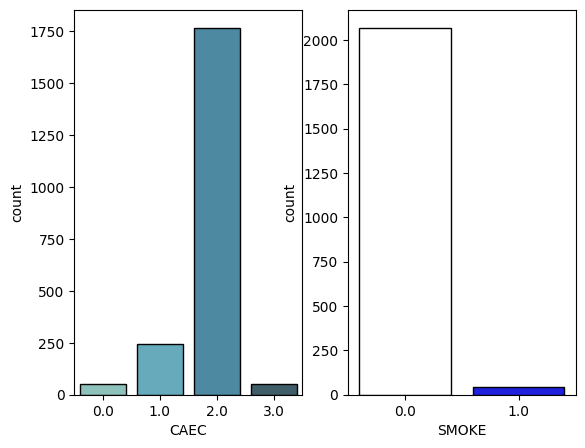

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(x= 'CAEC', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = df, palette="flag",edgecolor="black")

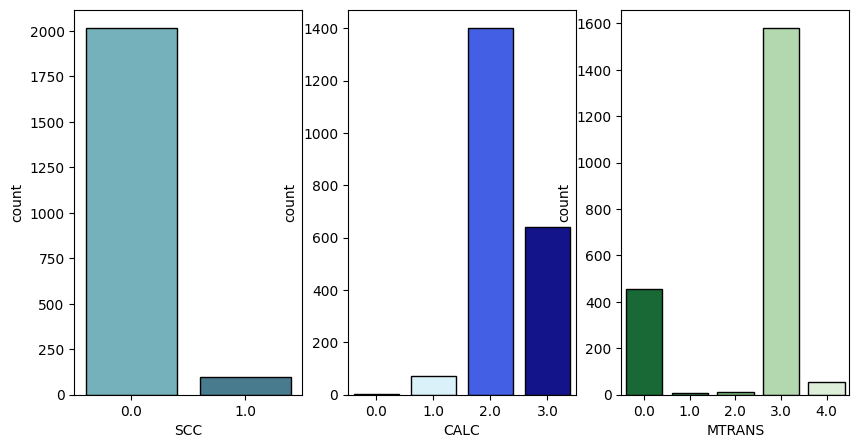

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(x= 'SCC', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'CALC', data = df, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = df, palette="Greens_r",edgecolor="black")

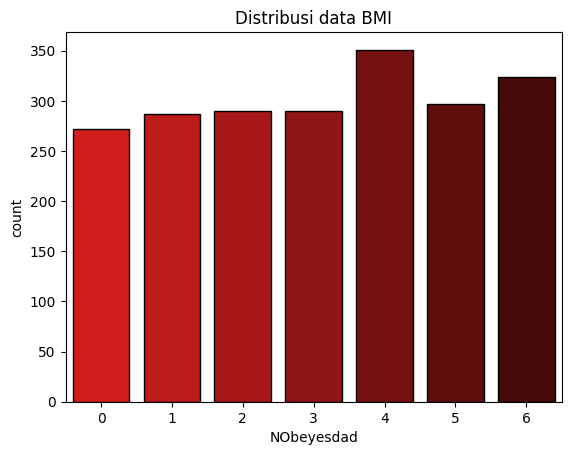

In [62]:
ax = sns.countplot(x = "NObeyesdad",data=df, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)

In [63]:
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,-0.031464
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945,0.282913
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.133565
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.913251
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.505148
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.247793
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.227759
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,0.026690
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.329350
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,0.003442


In [64]:
X = df.drop(columns = 'NObeyesdad')

In [65]:
y = df['NObeyesdad']

In [66]:
from sklearn.preprocessing import MinMaxScaler
features = MinMaxScaler().fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=144)

In [68]:
import xgboost as xgb

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics  import classification_report,confusion_matrix

In [70]:
model_rdf = RandomForestClassifier()

In [71]:
model_rdf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_rdf = model_rdf.predict(X_test)

In [81]:
confusion_matrix(y_test,y_pred_rdf)

array([[50,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  3,  0,  0,  0,  0],
       [ 0,  6, 56,  1,  0,  0,  0],
       [ 0,  1,  0, 62,  0,  0,  0],
       [ 0,  0,  0,  2, 65,  0,  0],
       [ 0,  0,  0,  0,  0, 61,  0],
       [ 0,  0,  0,  0,  1,  0, 65]])

In [82]:
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_rdf, digits=4))

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     1.0000    0.9804    0.9901        51
           1     0.8596    0.9423    0.8991        52
           2     0.9492    0.8889    0.9180        63
           3     0.9538    0.9841    0.9688        63
           4     0.9848    0.9701    0.9774        67
           5     1.0000    1.0000    1.0000        61
           6     1.0000    0.9848    0.9924        66

    accuracy                         0.9645       423
   macro avg     0.9639    0.9644    0.9637       423
weighted avg     0.9659    0.9645    0.9648       423



In [83]:
model_gbc = GradientBoostingClassifier()

In [84]:
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [85]:
y_pred_gbc = model_gbc.predict(X_test)

In [86]:
confusion_matrix(y_test,y_pred_gbc)

array([[51,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  2,  1,  0,  0,  0],
       [ 0,  5, 56,  2,  0,  0,  0],
       [ 0,  0,  1, 62,  0,  0,  0],
       [ 0,  0,  0,  0, 65,  2,  0],
       [ 0,  0,  0,  0,  0, 61,  0],
       [ 0,  0,  0,  0,  0,  1, 65]])

In [87]:
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_gbc, digits=4))

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        51
           1     0.9074    0.9423    0.9245        52
           2     0.9492    0.8889    0.9180        63
           3     0.9538    0.9841    0.9688        63
           4     1.0000    0.9701    0.9848        67
           5     0.9531    1.0000    0.9760        61
           6     1.0000    0.9848    0.9924        66

    accuracy                         0.9669       423
   macro avg     0.9662    0.9672    0.9664       423
weighted avg     0.9674    0.9669    0.9668       423



In [88]:
model_nb = GaussianNB()

In [89]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [90]:
y_pred_nb = model_nb.predict(X_test)

In [91]:
confusion_matrix(y_test,y_pred_nb)

array([[46,  0,  2,  0,  3,  0,  0],
       [13, 15, 13,  3,  8,  0,  0],
       [ 0,  2, 21,  1, 38,  1,  0],
       [ 0,  6,  1,  6, 44,  6,  0],
       [ 0,  3,  0,  2, 48, 14,  0],
       [ 0,  0,  0,  0,  2, 59,  0],
       [ 0,  0,  0,  1,  1,  0, 64]])

In [92]:
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_nb, digits=4))

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.7797    0.9020    0.8364        51
           1     0.5769    0.2885    0.3846        52
           2     0.5676    0.3333    0.4200        63
           3     0.4615    0.0952    0.1579        63
           4     0.3333    0.7164    0.4550        67
           5     0.7375    0.9672    0.8369        61
           6     1.0000    0.9697    0.9846        66

    accuracy                         0.6123       423
   macro avg     0.6366    0.6103    0.5822       423
weighted avg     0.6334    0.6123    0.5806       423



In [93]:
model_gbc = GradientBoostingClassifier()

In [94]:
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [95]:
y_pred_gbc = model_gbc.predict(X_test)

In [96]:
confusion_matrix(y_test,y_pred_gbc)

array([[51,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  2,  1,  0,  0,  0],
       [ 0,  5, 56,  2,  0,  0,  0],
       [ 0,  0,  1, 62,  0,  0,  0],
       [ 0,  0,  0,  0, 65,  2,  0],
       [ 0,  0,  0,  0,  0, 61,  0],
       [ 0,  0,  0,  0,  0,  1, 65]])

In [97]:
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_gbc, digits=4))

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        51
           1     0.9074    0.9423    0.9245        52
           2     0.9492    0.8889    0.9180        63
           3     0.9538    0.9841    0.9688        63
           4     1.0000    0.9701    0.9848        67
           5     0.9531    1.0000    0.9760        61
           6     1.0000    0.9848    0.9924        66

    accuracy                         0.9669       423
   macro avg     0.9662    0.9672    0.9664       423
weighted avg     0.9674    0.9669    0.9668       423



In [98]:
model_xgb = XGBClassifier()

In [99]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [100]:
y_pred_xgb = model_xgb.predict(X_test)

In [101]:
confusion_matrix(y_test,y_pred_xgb)

array([[51,  0,  0,  0,  0,  0,  0],
       [ 1, 50,  1,  0,  0,  0,  0],
       [ 0,  2, 60,  1,  0,  0,  0],
       [ 0,  0,  0, 63,  0,  0,  0],
       [ 0,  0,  0,  1, 66,  0,  0],
       [ 0,  0,  0,  0,  0, 61,  0],
       [ 0,  0,  0,  0,  0,  1, 65]])

In [102]:
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_xgb, digits=4))

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9808    1.0000    0.9903        51
           1     0.9615    0.9615    0.9615        52
           2     0.9836    0.9524    0.9677        63
           3     0.9692    1.0000    0.9844        63
           4     1.0000    0.9851    0.9925        67
           5     0.9839    1.0000    0.9919        61
           6     1.0000    0.9848    0.9924        66

    accuracy                         0.9835       423
   macro avg     0.9827    0.9834    0.9830       423
weighted avg     0.9836    0.9835    0.9834       423

